In [1]:
import tensorflow as tf
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error

In [3]:
ages = np.array(list(range(15, 81, 5))).reshape(14, 1)
values = np.array([[ 5 ], [ 18 ], [ 21 ], [ 24 ], [ 35 ], [ 42 ], [ 42] , [ 48 ] , [ 63 ], [ 70 ], [76], [81], [89], [100] ]) * 10

In [4]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'values')

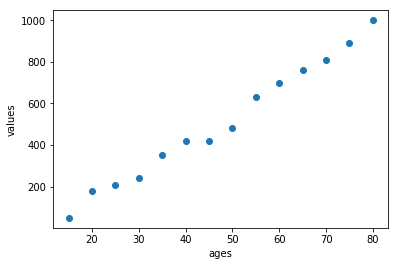

In [5]:
%matplotlib inline

plt.scatter(ages, values)
plt.xlabel('ages')
plt.ylabel('values')

In [6]:
ages

array([[15],
       [20],
       [25],
       [30],
       [35],
       [40],
       [45],
       [50],
       [55],
       [60],
       [65],
       [70],
       [75],
       [80]])

In [7]:
scaler_x = StandardScaler()
X = scaler_x.fit_transform(ages)
X

/home/evertontomalok/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/evertontomalok/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.61245155],
       [-1.36438208],
       [-1.11631261],
       [-0.86824314],
       [-0.62017367],
       [-0.3721042 ],
       [-0.12403473],
       [ 0.12403473],
       [ 0.3721042 ],
       [ 0.62017367],
       [ 0.86824314],
       [ 1.11631261],
       [ 1.36438208],
       [ 1.61245155]])

In [8]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(values)
y

/home/evertontomalok/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/evertontomalok/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.63101231],
       [-1.17007405],
       [-1.06370368],
       [-0.95733331],
       [-0.56730863],
       [-0.3191111 ],
       [-0.3191111 ],
       [-0.10637037],
       [ 0.42548147],
       [ 0.673679  ],
       [ 0.88641973],
       [ 1.06370368],
       [ 1.34735799],
       [ 1.73738268]])

In [9]:
np.random.seed(0)
b0, b1 = np.random.rand(2)
print(b0, b1)

0.5488135039273248 0.7151893663724195


In [10]:
b0, b1 = tf.Variable(b0), tf.Variable(b1)

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
result = b0 + b1 * X
losses = tf.losses.mean_squared_error(y, result)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(losses)
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.cast instead.


In [12]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(1000):
        sess.run(train)
    
    b0_final, b1_final = sess.run((b0, b1))
        
print(b0_final, b1_final)    

0.07412521235016709 0.9562728665810738


In [13]:
prediction = scaler_y.inverse_transform(b0_final + b1_final * X)
prediction

array([[ 96.02612309],
       [162.93068694],
       [229.83525078],
       [296.73981463],
       [363.64437847],
       [430.54894232],
       [497.45350616],
       [564.35807001],
       [631.26263385],
       [698.1671977 ],
       [765.07176155],
       [831.97632539],
       [898.88088924],
       [965.78545308]])

Text(0, 0.5, 'values')

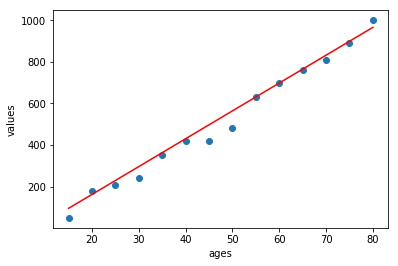

In [14]:
%matplotlib inline

plt.scatter(ages, values)
plt.plot(ages, prediction, color="red")
plt.xlabel('ages')
plt.ylabel('values')

In [15]:
a = scaler_x.transform(np.array([[20]]))



/home/evertontomalok/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
def calculate(age):
    a = scaler_x.transform(np.array([[ age ]]))
    return "Valor do plano R$%.2f" % scaler_y.inverse_transform(b0_final + b1_final * a)[0][0]

In [17]:
calculate(48)

/home/evertontomalok/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


'Valor do plano R$537.60'

In [21]:
calculate(80)

/home/evertontomalok/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


'Valor do plano R$965.79'

In [18]:
mae = mean_absolute_error(y, prediction)
mae

530.9057880864096

In [19]:
mse = mean_squared_error(y, prediction)
mse

354064.4196516497

In [20]:
meae = median_absolute_error(y, prediction)
meae

531.1185288222588